## The predictor for the car ratings

The predictor is built with decision tree regressor
Reference dataset: https://www.kaggle.com/datasets/kushleshkumar/cornell-car-rental-dataset?resource=download

In [94]:
"""
    Dependencies
"""
import pandas as pd
import numpy as np
import datetime
from sklearn import model_selection
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn import metrics
import matplotlib.pyplot as plt


In [95]:
%%time
"""
    Read dataset and process data
"""

# read the dataset
Data = pd.read_csv('CarRentalData.csv')
print(Data.head(0))

# process data: drop unecessary columns
#   drop city for there are too many cities
#   drop country for there is only one country
Data = Data.drop(['owner.id', 'location.city', 'location.country', 'location.state'], axis=1)
print(Data.head(0))

# process data: change year to time difference
# year_now = datetime.datetime.now().year
year_now = 2020
year_now_arr = pd.array([year_now]*Data.shape[0])
time_diff = year_now_arr - Data['vehicle.year']
Data = Data.drop(['vehicle.year'], axis=1)
Data['time_diff'] = time_diff

# process data: one-hot encodings
# Data['vehicle.make.model'] = Data['vehicle.make'] + '-' + Data['vehicle.model']
Data['vehicle.make.model'] = Data['vehicle.make']
Data = Data.drop(['vehicle.make', 'vehicle.model'], axis=1)
def oneHotEncode(df, col_list):
    for i in range(0, len(col_list)):
        col = col_list[i]
        # Get one hot encoding of columns B
        one_hot = pd.get_dummies(df[col])
        # Drop column B as it is now encoded
        df = df.drop([col],axis = 1)
        # Join the encoded df
        df = df.join(one_hot)
    return df

type_columns = ['fuelType', 'vehicle.type', 'vehicle.make.model']
Data = oneHotEncode(Data, type_columns)

# get rid of rating with nan value
Data = Data.dropna()

Data

Empty DataFrame
Columns: [fuelType, rating, renterTripsTaken, reviewCount, location.city, location.country, location.latitude, location.longitude, location.state, owner.id, rate.daily, vehicle.make, vehicle.model, vehicle.type, vehicle.year]
Index: []
Empty DataFrame
Columns: [fuelType, rating, renterTripsTaken, reviewCount, location.latitude, location.longitude, rate.daily, vehicle.make, vehicle.model, vehicle.type, vehicle.year]
Index: []
Wall time: 88 ms


,rating,renterTripsTaken,reviewCount,location.latitude,location.longitude,rate.daily,time_diff,DIESEL,ELECTRIC,GASOLINE,...,Saab,Saturn,Scion,Subaru,Suzuki,Tesla,Toyota,Volkswagen,Volvo,smart
0,5.00,13,12,47.449107,-122.308841,135,1,0,1,0,...,0,0,0,0,0,1,0,0,0,0
1,5.00,2,1,35.111060,-106.276551,190,2,0,1,0,...,0,0,0,0,0,1,0,0,0,0
2,4.92,28,24,35.127163,-106.566681,35,8,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,5.00,21,20,35.149726,-106.711425,75,2,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,5.00,3,1,35.208659,-106.601008,47,10,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5845,5.00,2,2,21.435401,-158.019400,50,6,0,0,1,...,0,0,0,0,0,0,0,0,0,0
5846,5.00,32,27,21.292950,-157.836856,33,3,0,0,1,...,0,0,0,0,0,0,0,0,0,0
5847,5.00,17,16,21.375507,-157.914919,49,10,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5848,4.94,18,17,21.378719,-157.727816,35,7,0,0,1,...,0,0,0,0,0,0,0,0,0,1


In [96]:
%%time
"""
    Use grid search to build a decision tree to predict
"""
parameters = {
    'max_depth': np.arange(3, 6, 1),
    'min_samples_split': np.arange(2, 5, 1),
    'min_samples_leaf': np.arange(1, 5, 1),
    'max_features': ['auto', 'sqrt', 'log2']
}

reg_dt = model_selection.GridSearchCV(
    estimator=DecisionTreeRegressor(),
    param_grid=parameters,
    cv=5
)

# split the dataset
X = Data.drop(['rating'], axis=1)
Y = Data['rating']
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X, Y)
print(X_train.shape)
print(Y_train.shape)
# train the dataset
reg_dt.fit(X_train, Y_train)

(4012, 69)
(4012,)
Wall time: 15.2 s


GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': array([3, 4, 5]),
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': array([1, 2, 3, 4]),
                         'min_samples_split': array([2, 3, 4])})

In [97]:
# get the decision tree model, check the metric
dt = reg_dt.best_estimator_
print(dt)
print(metrics.mean_squared_error(dt.predict(X_train), Y_train))
print(metrics.mean_squared_error(dt.predict(X_test), Y_test))
print(metrics.mean_absolute_error(dt.predict(X_train), Y_train))
print(metrics.mean_absolute_error(dt.predict(X_test), Y_test))

DecisionTreeRegressor(max_depth=3, max_features='sqrt', min_samples_leaf=3,
                      min_samples_split=4)
0.034254793294088225
0.029353988580720074
0.09663184324498753
0.0934277065169588


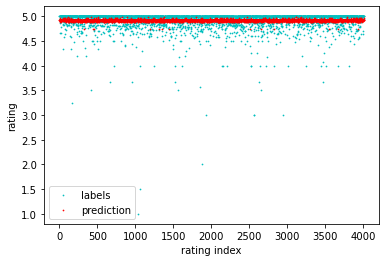

In [98]:
"""
    visualize the prediction result
"""
# plot the scatter graph to compare labels and predictions
x_axis = np.arange(1, Y_train.shape[0]+1, 1)
# s = [0**n for n in range(len(x_axis))]
plt.scatter(x_axis, Y_train, color='c', label='labels', s=0.5)
plt.scatter(x_axis, dt.predict(X_train), color='r', label='prediction', s=0.5)
plt.xlabel("rating index")
plt.ylabel('rating')
plt.legend()
plt.show()

[Text(167.4, 190.26, 'X[13] <= 0.5\nmse = 0.035\nsamples = 4012\nvalue = 4.92'),
 Text(83.7, 135.9, 'X[0] <= 98.5\nmse = 0.035\nsamples = 3891\nvalue = 4.918'),
 Text(41.85, 81.53999999999999, 'X[2] <= 30.081\nmse = 0.038\nsamples = 3565\nvalue = 4.922'),
 Text(20.925, 27.180000000000007, 'mse = 0.076\nsamples = 771\nvalue = 4.903'),
 Text(62.775000000000006, 27.180000000000007, 'mse = 0.027\nsamples = 2794\nvalue = 4.927'),
 Text(125.55000000000001, 81.53999999999999, 'X[1] <= 79.5\nmse = 0.01\nsamples = 326\nvalue = 4.881'),
 Text(104.625, 27.180000000000007, 'mse = 0.019\nsamples = 13\nvalue = 4.749'),
 Text(146.475, 27.180000000000007, 'mse = 0.009\nsamples = 313\nvalue = 4.886'),
 Text(251.10000000000002, 135.9, 'X[30] <= 0.5\nmse = 0.006\nsamples = 121\nvalue = 4.965'),
 Text(209.25, 81.53999999999999, 'X[38] <= 0.5\nmse = 0.007\nsamples = 114\nvalue = 4.964'),
 Text(188.32500000000002, 27.180000000000007, 'mse = 0.007\nsamples = 105\nvalue = 4.962'),
 Text(230.175, 27.1800000000

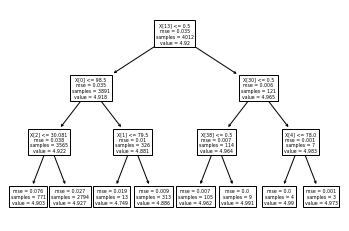

In [100]:
"""
    Visualize the tree structure
"""
# plot the decision tree structure
tree.plot_tree(dt)
#tree.export_graphviz(dt, out_file='decision_tree.dot')